In [27]:
import pandas as pd
import seaborn as srn
import statistics

In [3]:
dataset = pd.read_csv("../../Bases de Dados/Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
dataset.shape

(999, 12)

In [4]:
dataset.columns = ["id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos",
                   "TemCredito","Ativo","Salario","Saiu"]

In [10]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [13]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Estado'>

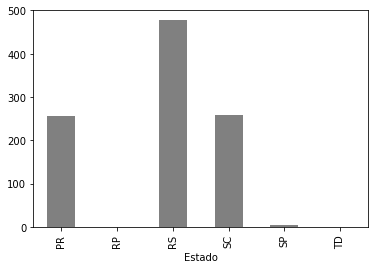

In [16]:
agrupado.plot.bar(color = 'gray')

<AxesSubplot:xlabel='Genero'>

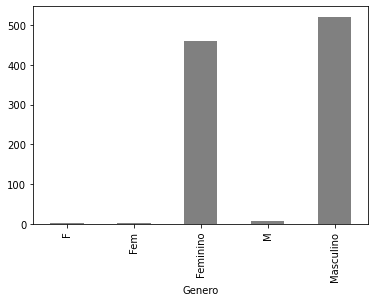

In [19]:
agrupado = dataset.groupby(['Genero']).size()
agrupado
agrupado.plot.bar(color = 'gray')

In [21]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

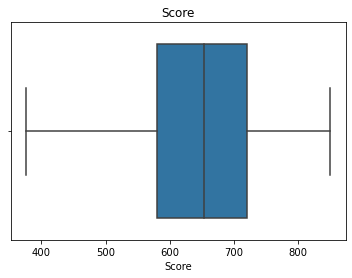

In [26]:
srn.boxplot(x = dataset.Score).set_title('Score')

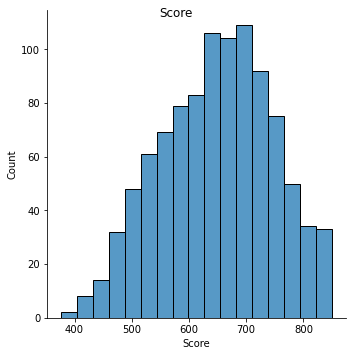

In [38]:
ax = srn.displot(dataset.Score)
ax.fig.suptitle('Score');


In [40]:
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

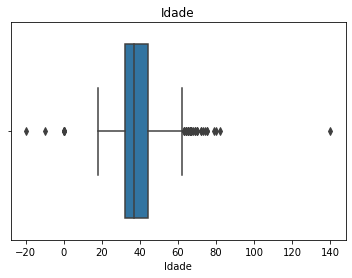

In [63]:
srn.boxplot(x = dataset.Idade).set_title('Idade')


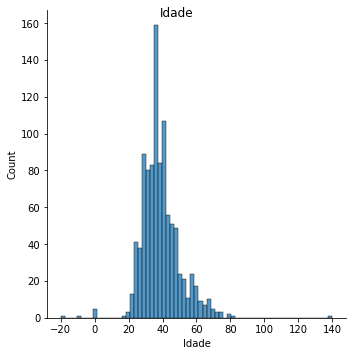

In [66]:
ax = srn.displot(x = dataset.Idade)
ax.fig.suptitle('Idade');


In [69]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

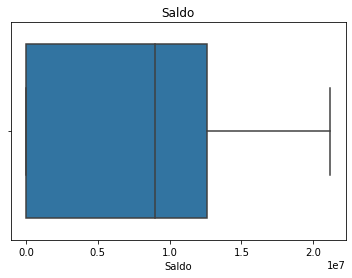

In [71]:
srn.boxplot(x =dataset['Saldo']).set_title('Saldo')

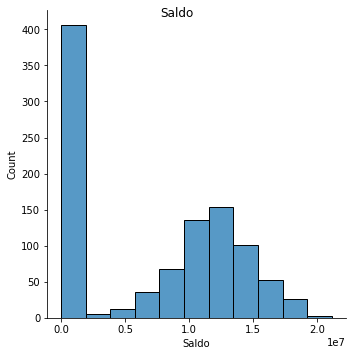

In [78]:
ax = srn.displot(dataset.Saldo)
ax.fig.suptitle('Saldo');


In [75]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

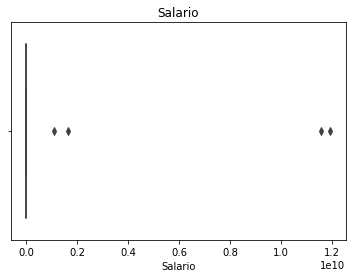

In [79]:
srn.boxplot(x = dataset.Salario).set_title('Salario')

<AxesSubplot:xlabel='Salario', ylabel='Density'>

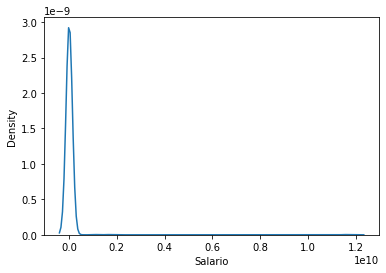

In [83]:
srn.kdeplot(dataset['Salario'])


In [85]:
dataset.isnull().sum()

id            0
Score         0
Estado        0
Genero        8
Idade         0
Patrimonio    0
Saldo         0
Produtos      0
TemCredito    0
Ativo         0
Salario       7
Saiu          0
dtype: int64

In [87]:
dataset.Salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [39]:
mediana = str.median(dataset['Salario'])
mediana

73752.0

In [40]:
dataset['Salario'].fillna(mediana, inplace = True)

In [97]:
dataset['Salario'].isnull().sum()

0

In [101]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [107]:
dataset['Genero'].isnull().sum()

0

In [106]:
dataset['Genero'].fillna('Masculino', inplace = True)

In [110]:
dataset.loc[dataset['Genero'] == 'M','Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']),'Genero'] = "Feminino"

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [112]:
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [116]:
mediana = str.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana

In [118]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu


In [5]:
dataset[dataset.duplicated(['id'],keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [7]:
dataset.drop_duplicates(subset='id', keep = 'first', inplace = True)
dataset[dataset.duplicated(['id'],keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu


In [8]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [9]:
dataset.loc[dataset['Estado'].isin(['RP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    479
SC    258
SP      4
dtype: int64

In [43]:
desv = statistics.stdev(data = dataset["Salario"])
desv

528988916.9661659

In [44]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [46]:
mediana = statistics.median(dataset['Salario'])
mediana

8637195.5

In [47]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana
dataset.loc[dataset['Salario'] >= 2 * desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu


In [49]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [50]:
dataset.shape

(998, 12)